# 05. Descreptives
In this notebook we load the data from the json-files for RF as the descriptive analysis is independent from the mdoel.

## Load json data for RF 

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils_boxplots import flatten_data, plot_eval
import numpy as np
import seaborn as sns
from tabulate import tabulate

# remove waringns
import warnings
warnings.filterwarnings("ignore")


#### First: Random Forest
# set file path to json files (change model) -> get names of json files
json_path = "/Users/nadja/Documents/University/Master_Statistik/WS2023_24/SLDS/slds_stratification/Simulations/Final_Setup/results/rf/"
json_files = os.listdir(json_path)


# load data from json file
data = []
for file in json_files:
    with open(json_path + file) as f:
        data_new = json.load(f)
        data = data + data_new

# flatten dictionary and convert to dataframe
data_all_flatten, keys_dic = flatten_data(data)
data = pd.DataFrame(data_all_flatten)
print('Shape of data', data.shape)
print('Colum names of data', data.columns)
print('Number of Colums', data.columns.shape)
print('Keys of dictionary (', len(keys_dic), ')', keys_dic)


# check for duplicates ind data
print('Duplicates: ', data.astype(str).duplicated().sum())


data.head()

Shape of data (4800, 75)
Colum names of data Index(['model_info_model', 'model_info_n_train', 'model_info_n_test',
       'model_info_n_features', 'model_info_noise',
       'model_info_transformation', 'model_info_group_size',
       'model_info_n_folds', 'model_info_n_iter', 'model_info_n_repetitions',
       'model_info_scoring', 'model_info_n_jobs', 'model_info_json_file',
       'repetition', 'random_state', 'hyperparameters_same',
       'unstratified_results_train r2', 'unstratified_results_test r2',
       'unstratified_results_train mse', 'unstratified_results_test mse',
       'unstratified_results_train mae', 'unstratified_results_test mae',
       'stratified_results_train r2', 'stratified_results_test r2',
       'stratified_results_train mse', 'stratified_results_test mse',
       'stratified_results_train mae', 'stratified_results_test mae',
       'cv_unstratified_iterations_mean_fit_time',
       'cv_unstratified_iterations_std_fit_time',
       'cv_unstratified_iterat

,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_noise,model_info_transformation,model_info_group_size,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,...,cv_folds_descriptives_unstratified_intersection_area,cv_folds_descriptives_stratified_ks_statistic,cv_folds_descriptives_stratified_p_value,cv_folds_descriptives_stratified_intersection_area,unstratified_best_params_min_samples_split,unstratified_best_params_min_samples_leaf,unstratified_best_params_max_features,stratified_best_params_min_samples_split,stratified_best_params_min_samples_leaf,stratified_best_params_max_features
0,rf,200,100000,8,0,identity,5,5,200,30,...,0.877017,0.025,1.0,0.957862,2,1,8,2,1,6
1,rf,200,100000,8,0,identity,5,5,200,30,...,0.874369,0.025,1.0,0.947189,4,1,7,5,1,6
2,rf,200,100000,8,0,identity,5,5,200,30,...,0.897163,0.025,1.0,0.959497,2,1,7,2,1,7
3,rf,200,100000,8,0,identity,5,5,200,30,...,0.886524,0.025,1.0,0.955489,2,1,6,2,1,5
4,rf,200,100000,8,0,identity,5,5,200,30,...,0.881115,0.025,1.0,0.964351,2,1,7,4,1,5


In [42]:
model_vars = ['model_info_transformation', 'model_info_n_train',	'model_info_noise',	'model_info_group_size']
model_vars_title =  [s.rsplit('_', 1)[-1] for s in model_vars]

data['param_model'] = data.loc[:, model_vars].astype(str).agg('_'.join, axis=1)
print('Shape of data', data.shape)
data['param_model'].head()

Shape of data (4800, 76)


0    identity_200_0_5
1    identity_200_0_5
2    identity_200_0_5
3    identity_200_0_5
4    identity_200_0_5
Name: param_model, dtype: object

# Descriptive Analysis

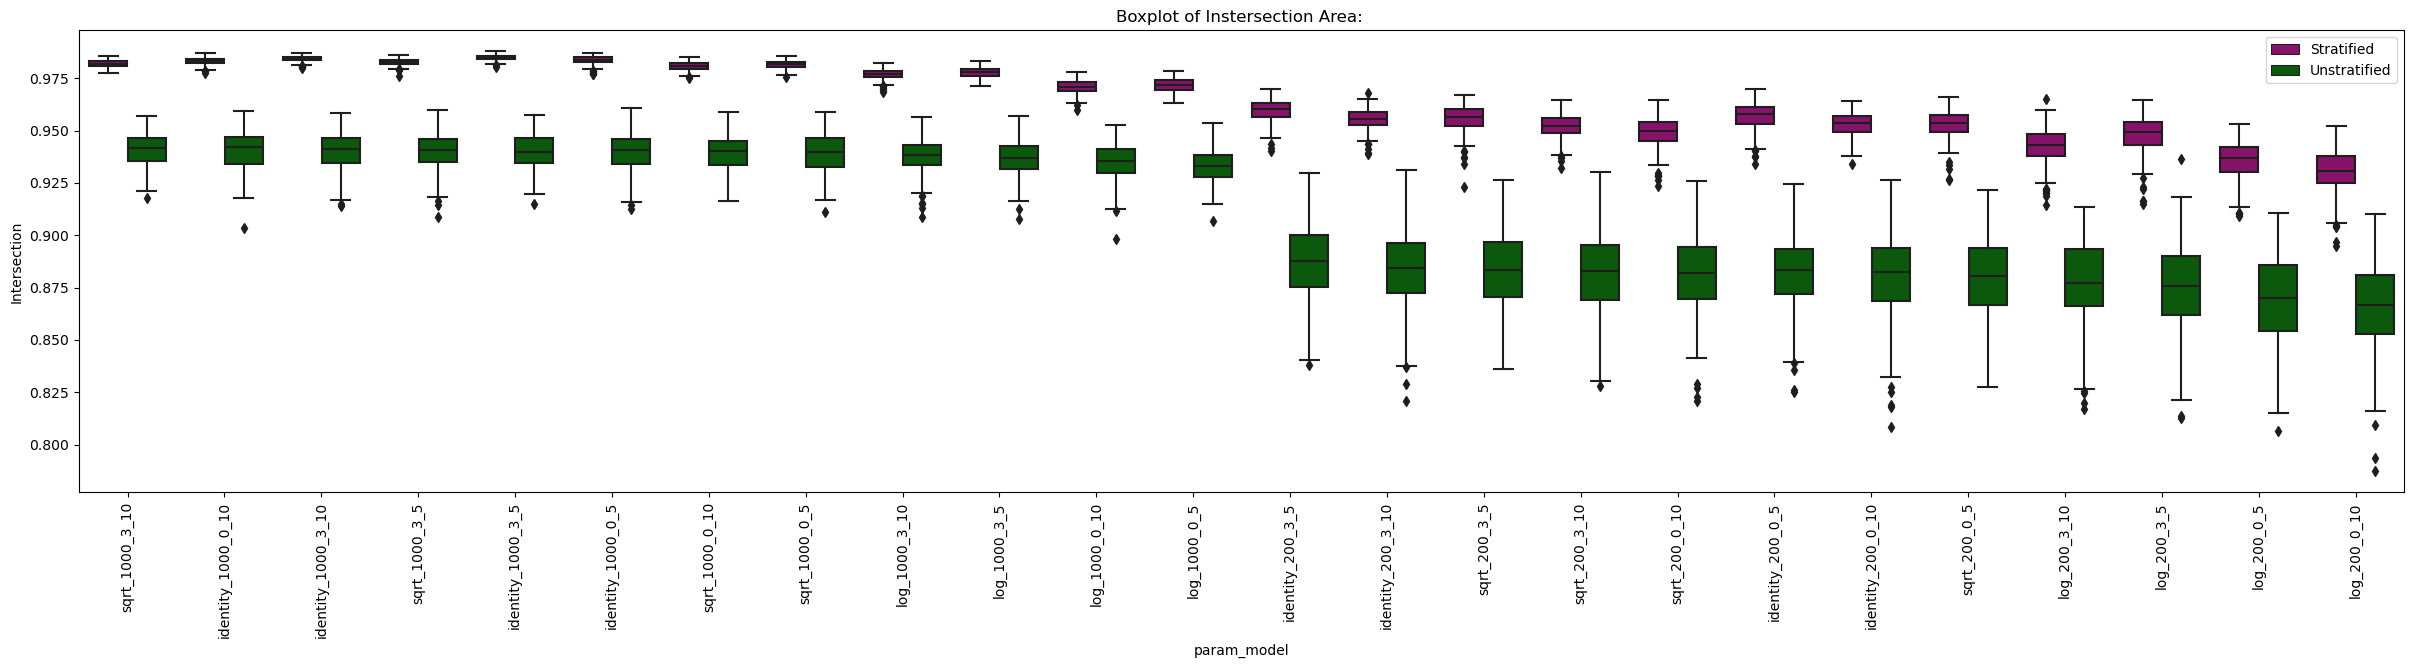

,Expermintel Hyperparameter Combinaiton,Difference Mean,Difference SD
5,identity_200_0_5,0.075775,-0.011865
21,sqrt_200_0_5,0.072926,-0.012281
7,identity_200_3_5,0.072798,-0.013215
4,identity_200_0_10,0.072670,-0.014889
23,sqrt_200_3_5,0.072221,-0.011109
6,identity_200_3_10,0.071967,-0.014395
15,log_200_3_5,0.071911,-0.012318
22,sqrt_200_3_10,0.069765,-0.014595
20,sqrt_200_0_10,0.067591,-0.012417
13,log_200_0_5,0.065605,-0.012120


In [5]:
differences_table_all = pd.DataFrame()
# rename colums that startified and unstratified is written at the end
data = data.rename(columns={'cv_folds_descriptives_stratified_intersection_area': 'cv_folds_descriptives_intersection_area_stratified', 'cv_folds_descriptives_unstratified_intersection_area': 'cv_folds_descriptives_intersection_area_unstratified'})


# make data long
data_error_long = data.melt(id_vars=['param_model'], 
                                                value_vars=['cv_folds_descriptives_intersection_area_stratified', 'cv_folds_descriptives_intersection_area_unstratified'], 
                                                var_name='Stratification', value_name='Intersection')

# definer ordering of boxplots
filtered_data = data_error_long[data_error_long['Stratification'] == 'cv_folds_descriptives_intersection_area_unstratified']
mean_intersection = filtered_data.groupby(['param_model'])['Intersection'].mean().reset_index().sort_values(by='Intersection', ascending=False)

### Deacreptives
descriptives = data_error_long.groupby(['param_model', 'Stratification']).describe()
keys = descriptives['Intersection']['mean'].keys()
 # descriptives['Intesection']['count'].values  # check N per boxplot
descriptives_table = pd.DataFrame({'Expermintel Hyperparameter Combinaiton': keys.get_level_values('param_model'), 
                                           'Stratification': keys.get_level_values('Stratification').str.rsplit('_', n=1).str[-1], 
                                           'Mean': descriptives['Intersection']['mean'].values, 
                                           'SD': descriptives['Intersection']['std'].values})
difference_mean =  descriptives_table[descriptives_table['Stratification']==  'stratified']['Mean'].values - descriptives_table[descriptives_table['Stratification']==  'unstratified']['Mean'].values
difference_sd =  descriptives_table[descriptives_table['Stratification']==  'stratified']['SD'].values - descriptives_table[descriptives_table['Stratification']==  'unstratified']['SD'].values
differences = pd.DataFrame({'Expermintel Hyperparameter Combinaiton': keys.get_level_values('param_model').unique(), 
                                           'Difference Mean': difference_mean, 
                                           'Difference SD': difference_sd})
differences_table_all = pd.concat([differences_table_all, differences])


### Plot
plt.figure(figsize=(30, 6))  # Set the figure size to 10 inches by 6 inches
plt.title('Boxplot of Instersection Area: ')
sns.boxplot(x= data_error_long['param_model'], 
                    y= data_error_long['Intersection'], 
                    hue= data_error_long['Stratification'],  palette={'cv_folds_descriptives_intersection_area_stratified': '#990073', 
                     'cv_folds_descriptives_intersection_area_unstratified': 'darkgreen'}, 
                    showfliers=True, # hide outliers
                    order = list(mean_intersection['param_model']))  #showmeans=True, meanline=True
plt.xticks(rotation=90)  # rotate x labels by 90 degrees
legend = plt.legend()
for i, label in enumerate(legend.get_texts()):
        if label.get_text() == 'cv_folds_descriptives_intersection_area_stratified':
                label.set_text('Stratified')
        elif label.get_text() == 'cv_folds_descriptives_intersection_area_unstratified':
                label.set_text('Unstratified')
plt.show()

differences.sort_values(by='Difference Mean', ascending=False, inplace=True)
differences


Boxplots per unique experimental parameter combination comparing strativied vs. unstratified: 

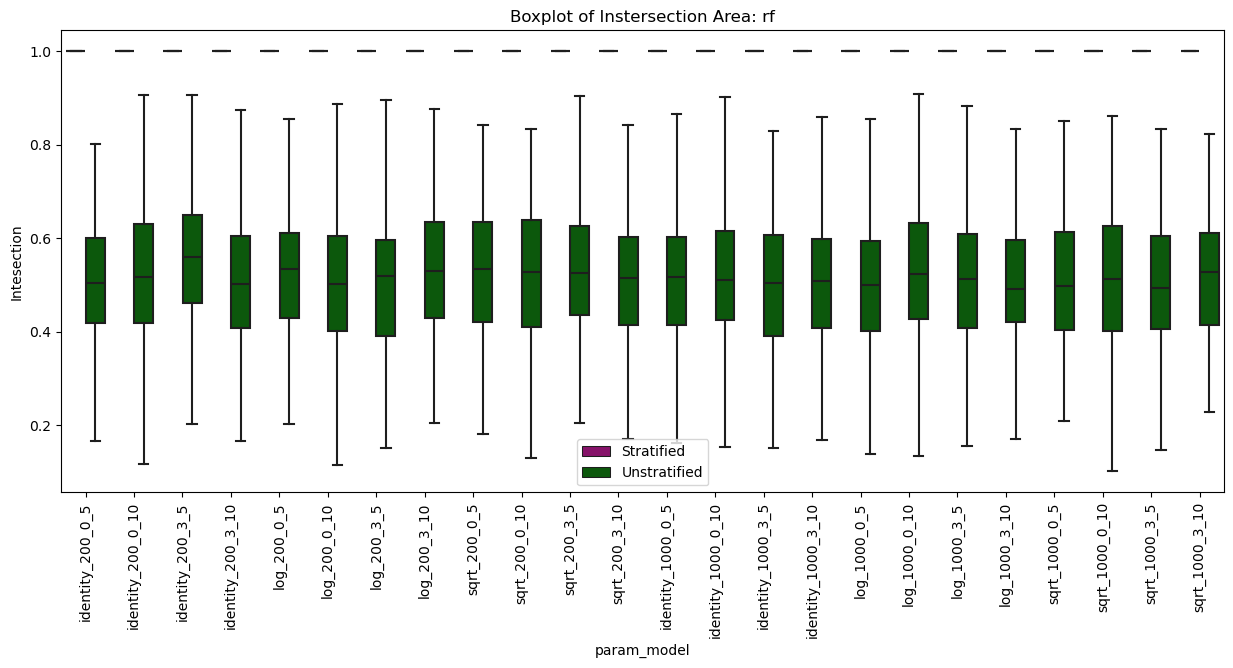

In [6]:
models = data['model_info_model'].unique()
differences_table_all = pd.DataFrame()

# rename colum s that startified and unstratified is written at the end
data = data.rename(columns={'cv_folds_descriptives_stratified_p_value': 'cv_folds_descriptives_p_value_stratified', 'cv_folds_descriptives_unstratified_p_value': 'cv_folds_descriptives_p_value_unstratified'})

for model in models: 
        data_error = data[data['model_info_model'] == model]
        # make data long
        data_error_long = data_error.melt(id_vars=['param_model'], 
                                                value_vars=['cv_folds_descriptives_p_value_stratified', 'cv_folds_descriptives_p_value_unstratified'], 
                                                var_name='Stratification', value_name='Intesection')
        data_error_long.groupby(['param_model', 'Stratification'], as_index=False)
        data_error_long.sort_values(['param_model'])  
        
        ### Plot
        plt.figure(figsize=(15, 6))  # Set the figure size to 10 inches by 6 inches
        plt.title('Boxplot of Instersection Area: ' + model)
        sns.boxplot(x=data_error_long['param_model'], 
                    y=data_error_long['Intesection'], 
                    hue=data_error_long['Stratification'],  palette={'cv_folds_descriptives_p_value_stratified': '#990073', 
                     'cv_folds_descriptives_p_value_unstratified': 'darkgreen'}, 
                    showfliers=False,  )  # hide outliers
        legend = plt.legend()
        for i, label in enumerate(legend.get_texts()):
                if label.get_text() == 'cv_folds_descriptives_p_value_stratified':
                        label.set_text('Stratified')
                elif label.get_text() == 'cv_folds_descriptives_p_value_unstratified':
                        label.set_text('Unstratified')


        plt.xticks(rotation=90)  # rotate x labels by 90 degrees
        plt.show()




In [38]:

def plot_eval(value_vars , value_name, data, moel_vars_des, transformation = 'None', model = 'None',):
        '''
        value_vars: list of strings, names of columns to be plotted for stratified and unstratified ['error_estimator_mean_stratified', 'error_estimator_mean_unstratified']. 
                        Important: stratified and unstratified must be written in the end after '_' otherwise automatic labeling won't work and you'll get an error
                        Important: stratifed first element, unstratified second element
        value_name: string, name of the value variable to be plotted. Basically name of value_vars that is plotted on the y-axis
        differences_table_all: pd.DataFrame, table of differences in mean and sd of stratified and unstratified , output of function with plots
        '''
        differences_table_all = pd.DataFrame()
        # make data long
        data_long = data.melt(id_vars=['param_model'], 
                                                value_vars= value_vars , 
                                                var_name='Stratification', value_name= value_name)

        # definer ordering of boxplots
        filtered_data = data_long[data_long['Stratification'] ==  value_vars[1]]
        mean_intersection = filtered_data.groupby(['param_model'])[value_name].mean().reset_index().sort_values(by= value_name, ascending=False)

        ### Deacreptives
        descriptives = data_long.groupby(['param_model', 'Stratification']).describe()
        keys = descriptives[value_name]['mean'].keys()
        # descriptives['Intesection']['count'].values  # check N per boxplot
        descriptives_table = pd.DataFrame({'Expermintel Hyperparameter Combinaiton': keys.get_level_values('param_model'), 
                                                'Stratification': keys.get_level_values('Stratification').str.rsplit('_', n=1).str[-1], 
                                                'Mean': descriptives[value_name]['mean'].values, 
                                                'SD': descriptives[value_name]['std'].values})
        difference_mean =  descriptives_table[descriptives_table['Stratification']==  'stratified']['Mean'].values - descriptives_table[descriptives_table['Stratification']==  'unstratified']['Mean'].values
        difference_sd =  descriptives_table[descriptives_table['Stratification']==  'stratified']['SD'].values - descriptives_table[descriptives_table['Stratification']==  'unstratified']['SD'].values
        differences = pd.DataFrame({'Expermintel Hyperparameter Combinaiton': keys.get_level_values('param_model').unique(), 
                                                'Difference Mean': difference_mean, 
                                                'Difference SD': difference_sd})
        differences_table_all = pd.concat([differences_table_all, differences])


        ### Plot
        plt.figure(figsize=(6, 3))  # Set the figure size to 10 inches by 6 inches
        if model == 'None' and transformation != 'None':
                plt.title('Ordered and grouped boxplot: ' + transformation )
        elif transformation == 'None' and model != 'None':
                plt.title('Ordered and grouped boxplot: ' + model)
        elif transformation != 'None' and model != 'None':
                plt.title('Ordered and grouped boxplot: ' + transformation + ' & ' + model.upper())
        else:
                plt.title('Ordered and grouped boxplot')
        sns.boxplot(x= data_long['param_model'], 
                        y= data_long[value_name], 
                        hue= data_long['Stratification'],  palette={value_vars[0]: '#990073', 
                        value_vars[1]: 'darkgreen'}, 
                        showfliers=False, # hide outliers
                        order = list(mean_intersection['param_model']))  #showmeans=True, meanline=True
        plt.xticks(rotation=90)  # rotate x labels by 90 degrees
        plt.ylabel(value_name)
        plt.xlabel('Hyperparameter Combination: '+ moel_vars_des)
        legend = plt.legend()
        for i, label in enumerate(legend.get_texts()):
                if label.get_text() == value_vars[0]:
                        label.set_text('Stratified')
                elif label.get_text() == value_vars[1]:
                        label.set_text('Unstratified')
        plt.show()
        differences.sort_values(by='Difference Mean', ascending=False, inplace=True)
        print(differences)
        return differences_table_all

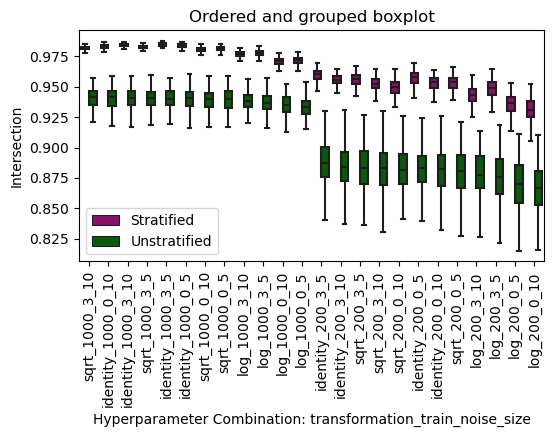

   Expermintel Hyperparameter Combinaiton  Difference Mean  Difference SD
5                        identity_200_0_5         0.075775      -0.011865
21                           sqrt_200_0_5         0.072926      -0.012281
7                        identity_200_3_5         0.072798      -0.013215
4                       identity_200_0_10         0.072670      -0.014889
23                           sqrt_200_3_5         0.072221      -0.011109
6                       identity_200_3_10         0.071967      -0.014395
15                            log_200_3_5         0.071911      -0.012318
22                          sqrt_200_3_10         0.069765      -0.014595
20                          sqrt_200_0_10         0.067591      -0.012417
13                            log_200_0_5         0.065605      -0.012120
12                           log_200_0_10         0.065211      -0.010804
14                           log_200_3_10         0.064872      -0.011612
3                       identity_1000_

In [48]:
# rename colums that startified and unstratified is written at the end
data = data.rename(columns={'cv_folds_descriptives_stratified_intersection_area': 'cv_folds_descriptives_intersection_area_stratified', 'cv_folds_descriptives_unstratified_intersection_area': 'cv_folds_descriptives_intersection_area_unstratified'})

differences_table_all = plot_eval(value_vars= ['cv_folds_descriptives_intersection_area_stratified', 'cv_folds_descriptives_intersection_area_unstratified'] , 
          value_name = 'Intersection', 
          data = data, model_vars_title = '_'.join(model_vars_title), transformation = 'None', model = 'None')